## Imports

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import mysql.connector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import joblib
# from sklearn.model_selection import train_test_split

In [2]:
with open('../config.env') as f:
    credentials=f.read()
credentials=credentials.split(" ")
con = mysql.connector.connect(username=credentials[0],password=credentials[1],host=credentials[2],port=credentials[3],database=credentials[4])
query=con.cursor()



In [3]:
sql="SELECT * FROM total_india_cases"
query.execute(sql)
result=query.fetchall()
column=[columns[0] for columns in query.description]

In [4]:
data=pandas.DataFrame(result,columns=column)

In [5]:
data

,index_no,date,ordinal_date,total_confirmed,total_active,total_recovered,total_deaths,total_tested,total_vaccinated1,total_vaccinated2,...,delta7_confirmed,delta7_active,delta7_recovered,delta7_deaths,delta7_tested,delta7_vaccinated1,delta7_vaccinated2,total_other,delta_other,delta7_other
0,1,2020-01-30,737454,1,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,2,2020-02-02,737457,2,2,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
2,3,2020-02-03,737458,3,3,0,0,0,0,0,...,3,3,0,0,0,0,0,0,0,0
3,4,2020-02-14,737469,3,0,3,0,0,0,0,...,0,-3,3,0,0,0,0,0,0,0
4,5,2020-03-02,737486,5,2,3,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,559,2021-09-07,738040,33095455,384603,32256563,441443,534943093,540557826,166985192,...,284709,12034,270234,2389,11758800,37226299,16203211,12846,-3,52
559,560,2021-09-08,738041,33138856,387035,32297183,441782,536817243,546897006,169700422,...,282135,4103,275763,2221,11948509,37097380,16462714,12856,10,48
560,561,2021-09-09,738042,33163007,386515,32321580,442040,538604854,551843120,171941466,...,260662,-7014,265495,2124,12069786,36311782,16512836,12872,16,57
561,562,2021-09-10,738043,33200882,387395,32358251,442350,540196989,556541427,174048261,...,255870,-12032,265744,2092,11956951,36675214,16703269,12886,14,66


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index_no            563 non-null    int64 
 1   date                563 non-null    object
 2   ordinal_date        563 non-null    int64 
 3   total_confirmed     563 non-null    int64 
 4   total_active        563 non-null    int64 
 5   total_recovered     563 non-null    int64 
 6   total_deaths        563 non-null    int64 
 7   total_tested        563 non-null    int64 
 8   total_vaccinated1   563 non-null    int64 
 9   total_vaccinated2   563 non-null    int64 
 10  delta_confirmed     563 non-null    int64 
 11  delta_active        563 non-null    int64 
 12  delta_recovered     563 non-null    int64 
 13  delta_deaths        563 non-null    int64 
 14  delta_tested        563 non-null    int64 
 15  delta_vaccinated1   563 non-null    int64 
 16  delta_vaccinated2   563 no

In [7]:
data.describe()

,index_no,ordinal_date,total_confirmed,total_active,total_recovered,total_deaths,total_tested,total_vaccinated1,total_vaccinated2,delta_confirmed,...,delta7_confirmed,delta7_active,delta7_recovered,delta7_deaths,delta7_tested,delta7_vaccinated1,delta7_vaccinated2,total_other,delta_other,delta7_other
count,563.000000,563.000000,5.630000e+02,5.630000e+02,5.630000e+02,563.000000,5.630000e+02,5.630000e+02,5.630000e+02,563.000000,...,5.630000e+02,563.000000,5.630000e+02,563.000000,5.630000e+02,5.630000e+02,5.630000e+02,563.000000,563.000000,563.000000
mean,282.000000,737762.829485,1.153823e+07,6.090246e+05,1.076974e+07,155206.731794,1.740087e+08,7.894380e+07,2.067200e+07,59026.843694,...,4.119268e+05,4815.232682,4.014593e+05,5492.298401,6.670173e+06,6.775259e+06,2.102286e+06,4262.030195,22.891652,159.907638
std,162.668374,162.974779,1.117944e+07,7.826570e+05,1.076652e+07,141628.034880,1.637075e+08,1.406256e+08,3.983669e+07,82065.954790,...,5.716306e+05,223871.173429,5.587334e+05,6950.149209,4.712001e+06,1.069840e+07,3.832118e+06,4628.465618,72.139944,285.989769
min,1.000000,737454.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,-813296.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-242.000000,-37.000000
25%,141.500000,737622.500000,1.023036e+06,1.655485e+05,6.453480e+05,25938.000000,1.325323e+07,0.000000e+00,0.000000e+00,13399.000000,...,9.293500e+04,-31436.500000,8.749100e+04,1037.500000,2.087484e+06,0.000000e+00,0.000000e+00,382.500000,1.000000,11.000000
50%,282.000000,737763.000000,9.608521e+06,3.919550e+05,9.058061e+06,139738.000000,1.458855e+08,0.000000e+00,0.000000e+00,37654.000000,...,2.682940e+05,1182.000000,2.605380e+05,3431.000000,6.861478e+06,0.000000e+00,0.000000e+00,2329.000000,9.000000,62.000000
75%,422.500000,737903.500000,1.677747e+07,6.927100e+05,1.397027e+07,190929.500000,2.770590e+08,1.177584e+08,2.188972e+07,62246.500000,...,4.382895e+05,35417.000000,4.324405e+05,6596.500000,1.109811e+07,1.258839e+07,2.019110e+06,7018.000000,18.000000,130.500000
max,563.000000,738044.000000,3.323217e+07,3.741267e+06,3.239614e+07,442688.000000,5.418058e+08,5.611020e+08,1.771054e+08,414280.000000,...,2.746319e+06,883540.000000,2.637025e+06,29336.000000,2.156277e+07,4.291877e+07,1.698282e+07,12891.000000,1356.000000,1445.000000


<AxesSubplot:xlabel='date'>

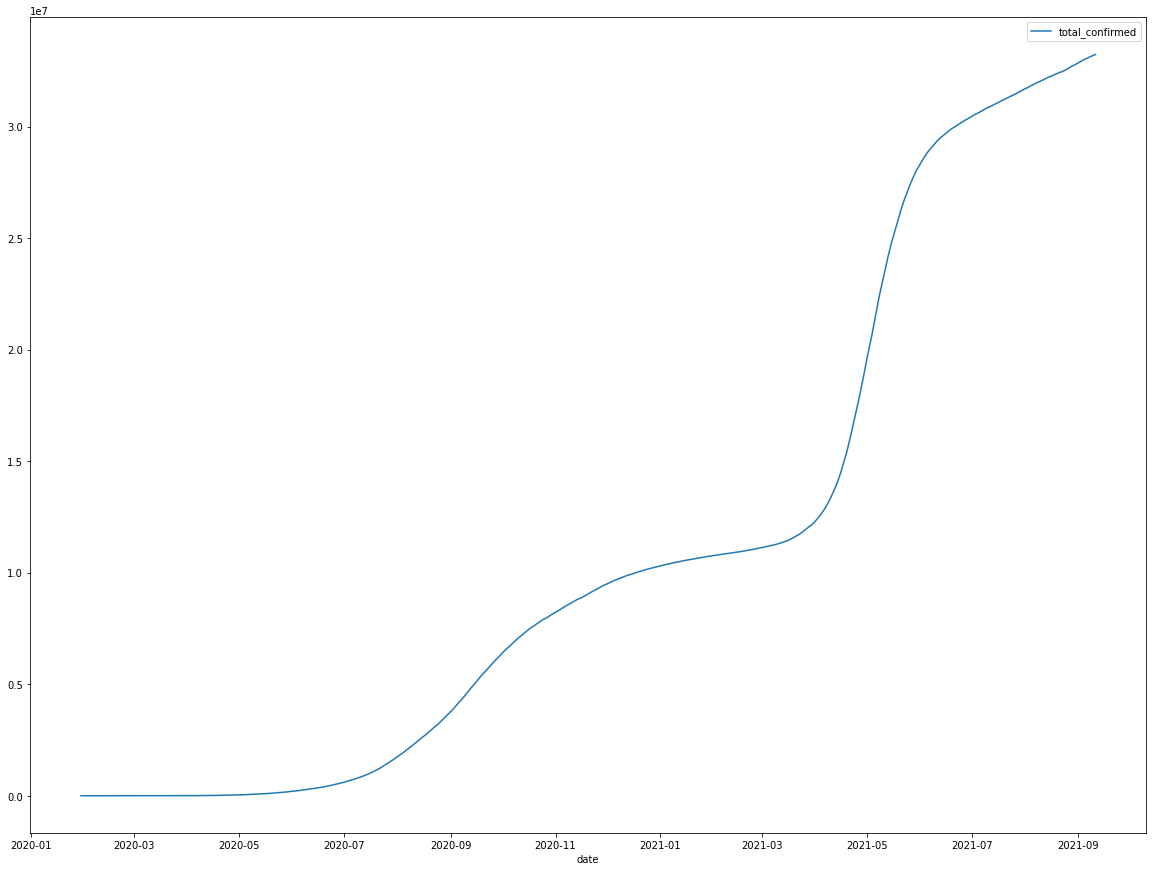

In [8]:
data.plot(kind='line',x='date',y='total_confirmed',figsize=(20,15))

<AxesSubplot:xlabel='date'>

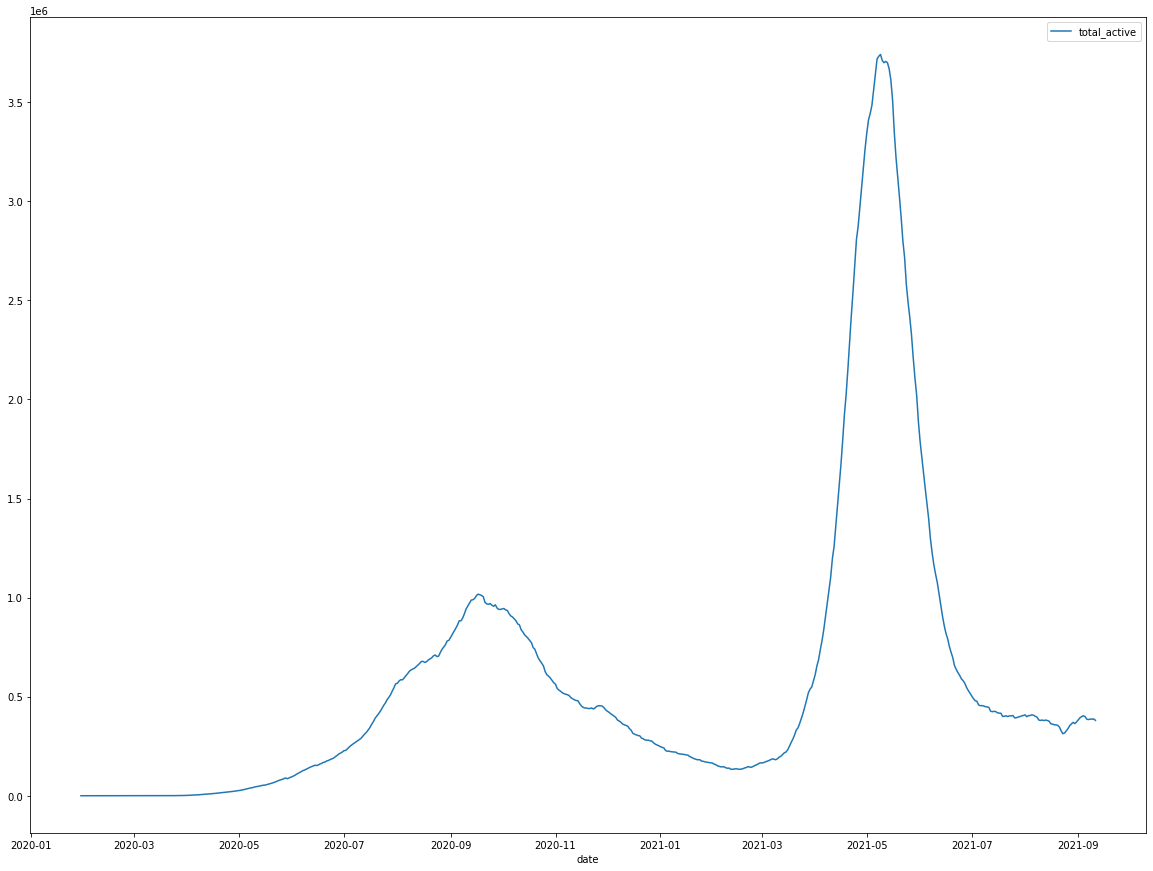

In [9]:
data.plot(kind='line',x='date',y='total_active',figsize=(20,15))

<AxesSubplot:xlabel='date'>

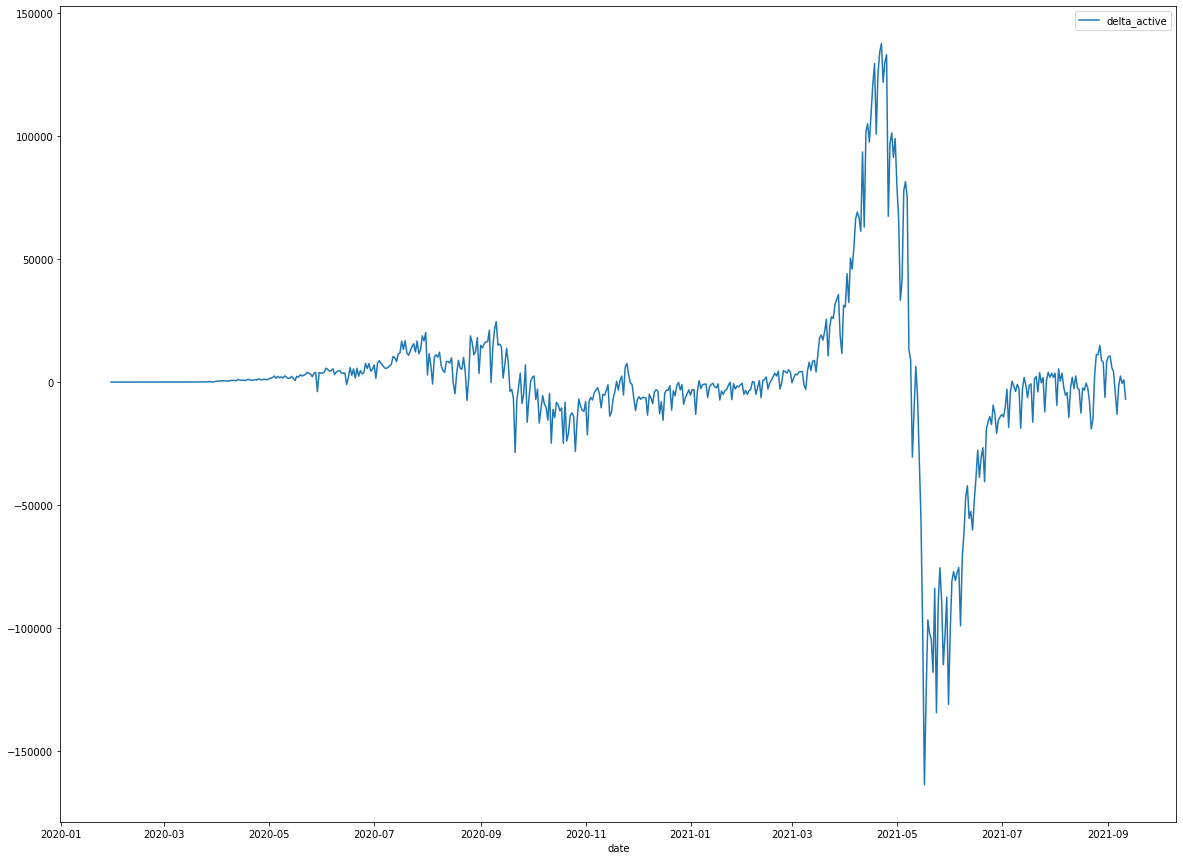

In [10]:
data.plot(kind='line',x='date',y='delta_active',figsize=(20,15))

<AxesSubplot:xlabel='date'>

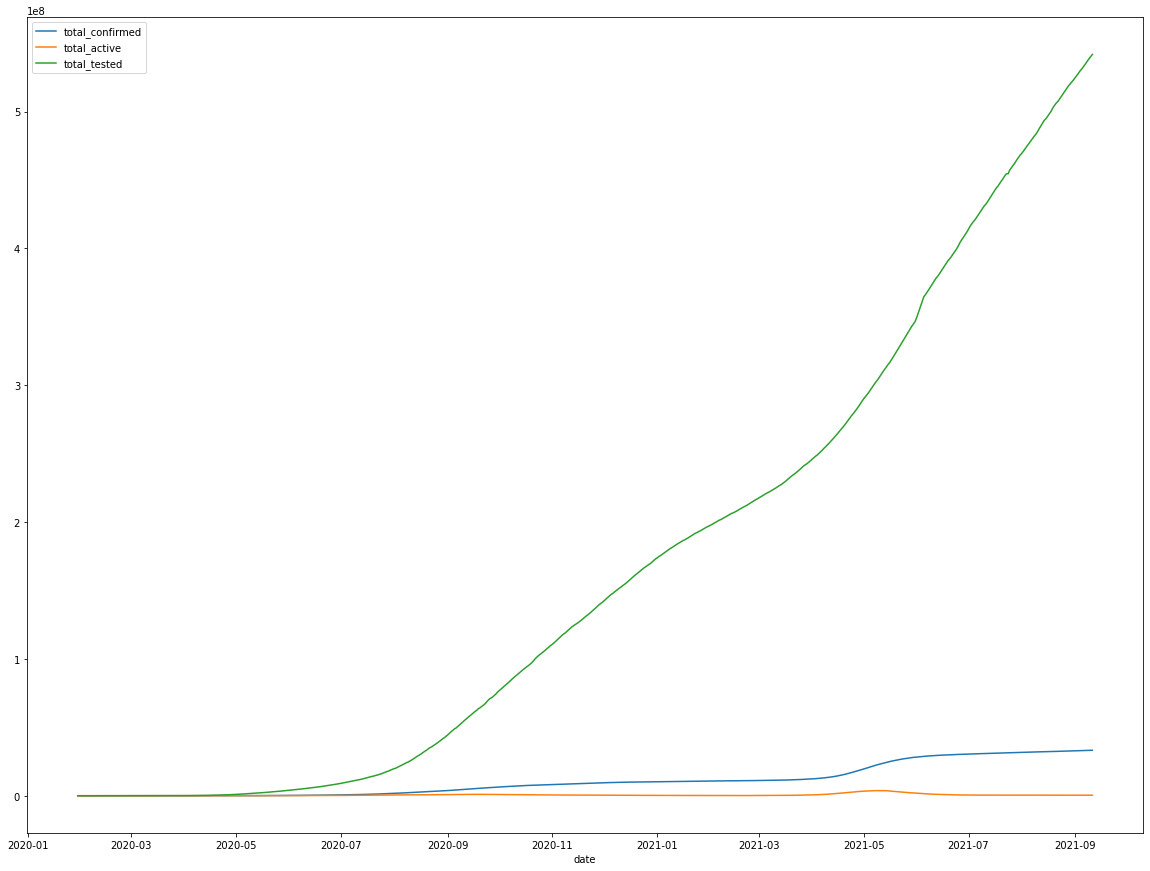

In [11]:
data.plot(kind='line',x='date',y=['total_confirmed','total_active','total_tested'],figsize=(20,15))

<AxesSubplot:xlabel='date'>

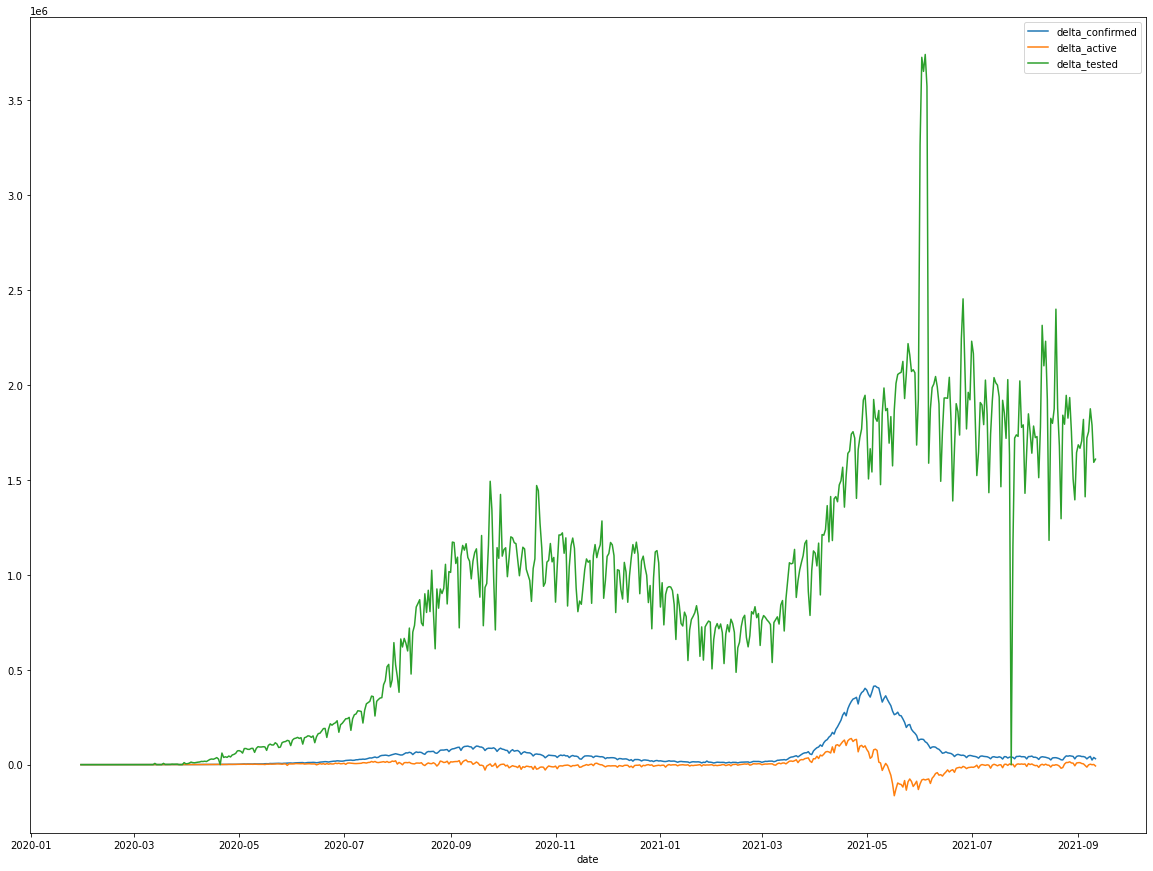

In [12]:
data.plot(kind='line',x='date',y=['delta_confirmed','delta_active','delta_tested'],figsize=(20,15))

<AxesSubplot:xlabel='date'>

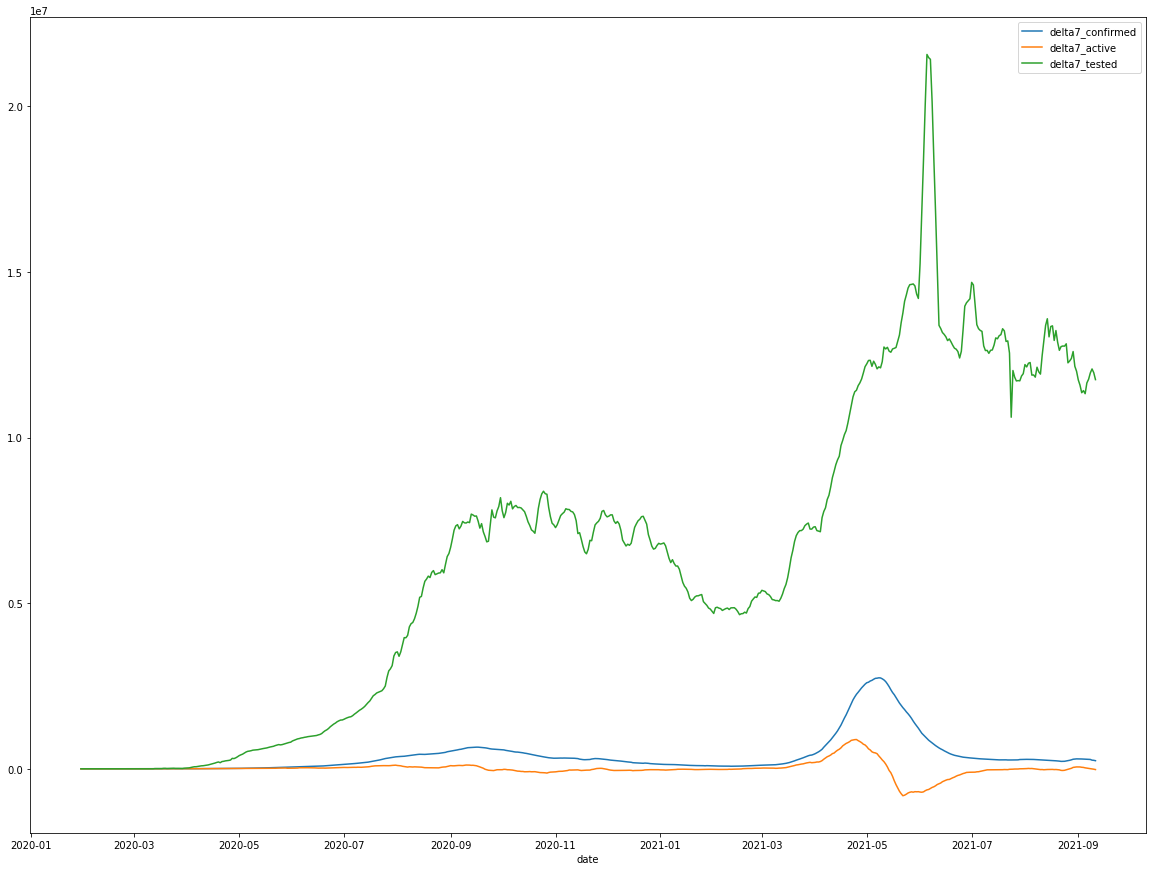

In [13]:
data.plot(kind='line',x='date',y=['delta7_confirmed','delta7_active','delta7_tested'],figsize=(20,15))

In [14]:
data.corr()

,index_no,ordinal_date,total_confirmed,total_active,total_recovered,total_deaths,total_tested,total_vaccinated1,total_vaccinated2,delta_confirmed,...,delta7_confirmed,delta7_active,delta7_recovered,delta7_deaths,delta7_tested,delta7_vaccinated1,delta7_vaccinated2,total_other,delta_other,delta7_other
index_no,1.000000,0.999922,0.939633,0.395065,0.934157,0.942270,0.963955,0.763022,0.725117,0.383267,...,0.394665,-0.079526,0.430188,0.424322,0.892872,0.793758,0.730750,0.927549,0.187269,0.338952
ordinal_date,0.999922,1.000000,0.938948,0.395138,0.933449,0.941647,0.963257,0.762176,0.724298,0.383300,...,0.394679,-0.079354,0.430132,0.424353,0.892677,0.792930,0.729951,0.926770,0.187249,0.338900
total_confirmed,0.939633,0.938948,1.000000,0.372158,0.997791,0.994434,0.983477,0.891254,0.855763,0.332851,...,0.363491,-0.224329,0.455653,0.479806,0.903665,0.869572,0.821919,0.990156,0.145319,0.280061
total_active,0.395065,0.395138,0.372158,1.000000,0.309687,0.295564,0.307570,0.166564,0.134707,0.972344,...,0.994099,0.131651,0.952791,0.894920,0.567518,0.173688,0.228980,0.377715,0.395573,0.729784
total_recovered,0.934157,0.933449,0.997791,0.309687,1.000000,0.997512,0.985460,0.901138,0.867044,0.271385,...,0.301241,-0.239445,0.398696,0.427592,0.884967,0.878453,0.825588,0.987384,0.120563,0.234704
total_deaths,0.942270,0.941647,0.994434,0.295564,0.997512,1.000000,0.984828,0.897492,0.865126,0.258335,...,0.286109,-0.226178,0.378162,0.406916,0.891676,0.871613,0.824918,0.977562,0.114422,0.221785
total_tested,0.963955,0.963257,0.983477,0.307570,0.985460,0.984828,1.000000,0.889138,0.857323,0.294829,...,0.310972,-0.125816,0.363832,0.369339,0.859931,0.885825,0.841829,0.980000,0.142724,0.264363
total_vaccinated1,0.763022,0.762176,0.891254,0.166564,0.901138,0.897492,0.889138,1.000000,0.992084,0.159077,...,0.173426,-0.109106,0.217970,0.251401,0.699978,0.927780,0.947954,0.890940,0.046682,0.093300
total_vaccinated2,0.725117,0.724298,0.855763,0.134707,0.867044,0.865126,0.857323,0.992084,1.000000,0.120026,...,0.138892,-0.128935,0.191072,0.213705,0.656289,0.895094,0.946346,0.852337,0.023199,0.056741
delta_confirmed,0.383267,0.383300,0.332851,0.972344,0.271385,0.258335,0.294829,0.159077,0.120026,1.000000,...,0.989349,0.331614,0.868913,0.804732,0.513866,0.190750,0.252880,0.348002,0.430363,0.766082


In [15]:
def splitting(data,training_ratio):
    length=len(data)
    traing_indexes=int(length*training_ratio)
    training_set=data[:traing_indexes]
    testing_set=data[traing_indexes:]
    return training_set,testing_set

In [16]:
training_data,testing_data=splitting(data,0.9)

In [17]:
len(training_data)

506

In [18]:
len(testing_data)

57

In [19]:
training_data.value_counts()

index_no  date        ordinal_date  total_confirmed  total_active  total_recovered  total_deaths  total_tested  total_vaccinated1  total_vaccinated2  delta_confirmed  delta_active  delta_recovered  delta_deaths  delta_tested  delta_vaccinated1  delta_vaccinated2  delta7_confirmed  delta7_active  delta7_recovered  delta7_deaths  delta7_tested  delta7_vaccinated1  delta7_vaccinated2  total_other  delta_other  delta7_other
1         2020-01-30  737454        1                1             0                0             0             0                  0                  1                 1            0                0             0             0                  0                  1                  1             0                 0              0              0                   0                   0            0            0               1
333       2021-01-24  737814        10668676         181475        10329244         153508        192337117     1615504            0               

In [20]:
testing_data.value_counts()

index_no  date        ordinal_date  total_confirmed  total_active  total_recovered  total_deaths  total_tested  total_vaccinated1  total_vaccinated2  delta_confirmed  delta_active  delta_recovered  delta_deaths  delta_tested  delta_vaccinated1  delta_vaccinated2  delta7_confirmed  delta7_active  delta7_recovered  delta7_deaths  delta7_tested  delta7_vaccinated1  delta7_vaccinated2  total_other  delta_other  delta7_other
507       2021-07-17  737988        31105278         417054        30262243         413640        443958663     321893762          83037953           41283            -1305         42051            517           1936709       3228536            2007300            269016            -31369         294717            5568           13073193       18722264            10176865            12341         20          100             1
536       2021-08-15  738017        32225212         376460        31404401         431674        494805652     424072750          121784538       

In [21]:
features_data=training_data[['ordinal_date','delta_tested']]

In [22]:
features_data

,ordinal_date,delta_tested
0,737454,0
1,737457,0
2,737458,0
3,737469,0
4,737486,0
...,...,...
501,737983,1740325
502,737984,1915501
503,737985,2038319
504,737986,2011281


In [23]:
labels=training_data['total_confirmed']

In [24]:
labels

0             1
1             2
2             3
3             3
4             5
         ...   
501    30904734
502    30945048
503    30986807
504    31025878
505    31063995
Name: total_confirmed, Length: 506, dtype: int64

In [25]:
features=features_data.to_numpy()

In [26]:
features

array([[ 737454,       0],
       [ 737457,       0],
       [ 737458,       0],
       ...,
       [ 737985, 2038319],
       [ 737986, 2011281],
       [ 737987, 1998715]], dtype=int64)

# model implementation

In [27]:
model=LinearRegression()

In [28]:
model.fit(features,labels)

LinearRegression()

In [29]:
model.predict([[737987,2000000]])

array([24585440.73311996])

In [30]:
test_features=testing_data[['ordinal_date','delta_tested']].to_numpy()

In [31]:
test_labels=testing_data['total_confirmed']

In [32]:
predicted=model.predict(test_features)

In [33]:
predicted

array([24308403.57061768, 21987528.63446426, 24296676.2422142 ,
       24002453.53717804, 23374274.74679947, 24955854.50779343,
       23016736.99916458, 14920053.56536102, 20715981.1836586 ,
       23575614.73328781, 23697734.98609161, 23696130.30427933,
       25191737.46871948, 24010319.85791779, 24114536.42595673,
       22355348.45563126, 23492662.49249649, 24519821.49064255,
       24077357.27320099, 23563542.63294983, 24315433.72465897,
       24049358.20536041, 24117014.35195541, 23074741.78530884,
       24443148.007267  , 27153472.80534363, 26129293.43321609,
       26812302.71603394, 25325175.94760132, 21660103.33116913,
       24903713.56729507, 24811089.34493256, 25229697.60964203,
       27887049.44405746, 25320360.40710068, 24379620.18531799,
       22498582.42954254, 25256314.58899307, 25057340.48431015,
       25854359.83323669, 25295007.9936676 , 25874021.30480194,
       25025088.585186  , 23808282.52116013, 23303175.35544968,
       24581679.14699173, 24825978.33376

In [34]:
# plt.plot(predicted,test_features)

In [35]:
# plt.plot(test_features,predicted)

## Evaluation

In [36]:
mean_squared_error_evaluation=mean_squared_error(test_labels,predicted)
mean_absolute_error_evaluation=mean_absolute_error(test_labels,predicted)

In [37]:
mean_squared_error_evaluation

64481498791857.59

In [38]:
numpy.sqrt(mean_squared_error_evaluation)

8030037.2845870145

In [39]:
mean_absolute_error_evaluation

7863526.822254984

## Saving Model

In [40]:
Liner_regression_model_for_total_confirmed_cases_with_respect_to_date_and_delta_tested=joblib.dump(model,'Liner_regression_model_for_total_confirmed_cases_with_respect_to_date_and_delta_tested.joblib')